# Шаг 1. Выбор темы проекта. Обсуждение плана работы

● Какие задачи будут сделаны на первом этапе (разведочный анализ данных
и первичная аналитика данных)

● Какие задачи будут сделаны на втором этапе (ML)

● Какие задачи будут сделаны на третьем этапе (DL)

● Какие задачи хочется сделать, но, возможно, не успеете (привязать их к
нужным этапам)

● Создать репозиторий проекта на Github, в README.md написать описание
проекта и членов команды

● Добавить в репозиторий документ checkpoints.md, в котором расписать
подробно примерный план работы над проектом (см. выше).

● Ссылку на репозиторий закрепить в групповом чате

# Шаг 2. Разведочный анализ данных (табличные данные)

    ● Изучить особенности данных:

        ○ Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))
        ○ Есть ли пропущенные значения. Сколько. Какова их доля от общего числа объектов для каждого конкретного
        признака. И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений. Выдвинуть и
        (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно
        обработать пропуски
        ○ Есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче
        бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их
        ○ Есть ли выбросы в данных? По возможности обработать их

    ● Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также
    попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные
    распределения признаков (sns.pairplot()) и корреляции наиболее значимых

    ● Построить подходящие сводные таблицы и прочие диаграммы

    ● Если проведённый вами анализ позволяет сделать какие-либо выводы, запишите их текстом
    максимально развернуто. Упомяните, как вы планируете задействовать приобретенные вами
    на этом этапе знания о вашей задаче

# Исследование аномалий в транзакциях по кредитным картам

Представлен датасет о транзакциях по кредитным картам, который содержит подробные записи о транзакциях по кредитным картам, включая информацию о времени транзакции, суммах и связанные с ними личные данные и данные продавца. Этот набор данных содержит около 1,29 млн строк.


Описание данных

- Timestamp of the transaction - время транзакции

- cc_num - Номер кредитной карты (хэшированный или анонимизированный)

- merchant - магазин, в котором была совершена транзакция

- category - тип транзакции (например, покупка продуктов питания, развлечения)

- amt - сумма транзакции

- first - имя владельца карты

- last - фамилия владельца карты

- gender - пол

- street - адрес

- city - город

- state - страна

- zip - индекс

- lat - географическая координата (широта) транзакции

- long - географическая координата (долгота) транзакции

- city_pop - население города, в котором была совершена транзакция

- job - род занятий владельца карты

- dob - дата рождения владельца карты

- trans_num - уникальный номер транзакции

- unix_time - unix-время для транзакции

- merch_lat - географическая координата (широта) магазина

- merch_long - географическая координата (долгота) магазина

- is_fraud - показатель того, является ли транзакция мошеннической

- merch_zipcode - почтовый индекс продавца

**Целевой признак: is_fraud**

## Общая информация о данных

###Загрузка библиотек, датасета с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!kaggle datasets download priyamchoksi/credit-card-transactions-dataset

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset
License(s): apache-2.0
 90% 131M/145M [00:01<00:00, 82.8MB/s]
100% 145M/145M [00:01<00:00, 86.2MB/s]


In [3]:
data = pd.read_csv('/content/credit-card-transactions-dataset.zip')
data.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

###Анализ общей информации о данных.

In [4]:
pd.options.display.max_columns = None
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  merch_zipcode  
0         0        28705.0  
1         0            NaN  
2         0        83236.0  
3         0            NaN  
4         0        22844.0

 *Вывод:
 обзор первых пяти строк датасета показывает, что в столбцах есть и могут быть пропущенные данные.Далее более детально изучим структуру данных.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

*Анализ типов данных*

Столбец 'trans_date_trans_time' имеет тип данных - object. Поскольку в столбце указаны даты транзакций, то целесообразно для дальнейшего анализа привести к типу данных - datetime64.

Столбец 'unix_time' имеет тип данных - int64. И поскольку в столбце указаны данные датах, то для дальнейшего анализа удобнее перевести в тип данных - datetime64.

Построим распределения данных.

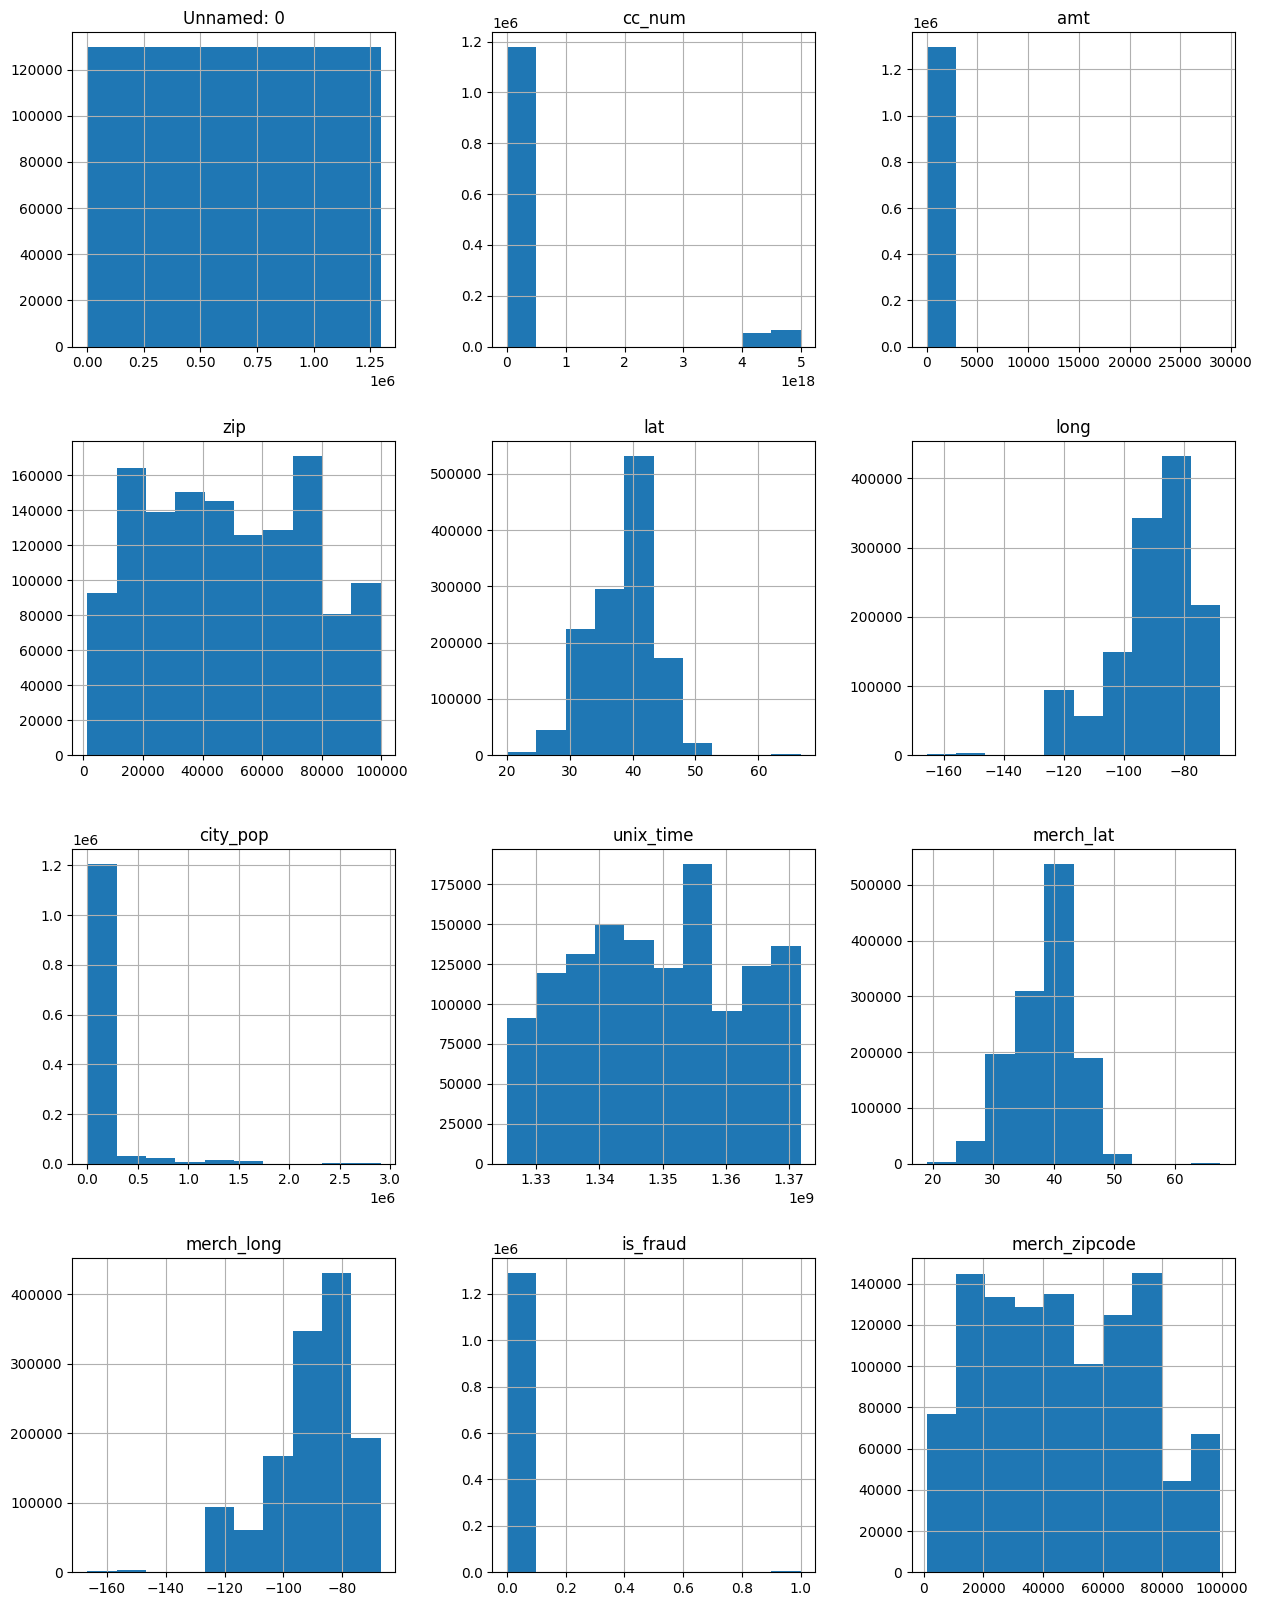

In [6]:
data.hist(figsize=(15, 20))
plt.show()

На основе полученных распрделений можно сделать следующие выводы:

- сумма транзаций amt варьируется от 0 до 2500;

- наиболее часто вречающиеся транзакции были осуществлены на широте (lat) от 38 до 42;

- наиболее часто встречающиеся транзакции были осуществлены на долготе (long) от -82 до -85;

- транзакции проводились чаще всего в городах с населением от 0 до 250 000;

- наиболее часто транзакции осуществлялись период времени по unix - time c 1,354-1,355 (1e^9). В дальнейшем переведем в даты и проанализируем данные периоды. Наименее часто транзацкии проводились в период времени с 1,358-1,362 (1e^9). B данный период оценим в дальнейшем анализе;

- чаще всего транзакции проводились в магазинах, расположенных на широте с 38 по 43. И незначительнное количество транзакций проводилось в магазинах, расположенных на широтах с 20 - 24 и с 48 по 53.

- аналогично в магазинах, расположенных на долготе с -81 до -85, чаще проводились транзакции;

- на диаграмме видно, что очень небольшое количество мошеннических транзакций незначительно. Данное соотношение проанализируем далее.

- Поскольку датасет содержит информацию о суммах транзакций, то они должны иметь неотрицательные значения. Проверим датасет на наличие отрицательных некорректных значений.

###Предобработка данных

In [7]:
data['name'] = data['first'] + " " +  data['last'] # создадим столбец name вместо двух столбцов first и last

In [8]:
# удалим столбцы Unnamed: 0, first,  last
# Unnamed: 0 - повторение индекса
# first и last - имя владельца считаю что ничего нам полезного не даст
# trans_num - номер транзакции уникальный, тоже ничего не даст
# unix_time - дублирует(наверное должен) колонку trans_date_trans_time
data = data.drop(['Unnamed: 0', 'trans_num', 'first', 'last', 'unix_time'], axis=1) # 'first', 'last'
# data.head(7)

In [9]:
# переведём столбец trans_date_trans_time в datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
# data['trans_date_trans_time'].info()

In [10]:
# разделим общую датувремя на год месяц день и отдельно время
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_time'] = data['trans_date_trans_time'].dt.time
data = data.drop('trans_date_trans_time', axis=1) # удалим столбец с датой

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   merchant       1296675 non-null  object 
 2   category       1296675 non-null  object 
 3   amt            1296675 non-null  float64
 4   gender         1296675 non-null  object 
 5   street         1296675 non-null  object 
 6   city           1296675 non-null  object 
 7   state          1296675 non-null  object 
 8   zip            1296675 non-null  int64  
 9   lat            1296675 non-null  float64
 10  long           1296675 non-null  float64
 11  city_pop       1296675 non-null  int64  
 12  job            1296675 non-null  object 
 13  dob            1296675 non-null  object 
 14  merch_lat      1296675 non-null  float64
 15  merch_long     1296675 non-null  float64
 16  is_fraud       1296675 non-null  int64  
 17  merch_zi

In [12]:
data.duplicated().sum() # полных дубликатов нет

0

In [13]:
numerical_columns = [b for b in data.columns if pd.api.types.is_numeric_dtype(data[b])]

negative_counts = (data[numerical_columns] < 0).sum()

print(negative_counts)

cc_num                 0
amt                    0
zip                    0
lat                    0
long             1296675
city_pop               0
merch_lat              0
merch_long       1296675
is_fraud               0
merch_zipcode          0
trans_year             0
trans_month            0
trans_day              0
dtype: int64


Отрицательных значений в суммах транзакций нет.


Вывод по обзору данных:

* датасет после обработки содержит 1296675 значений и 23 характеристики
* столбцы имеют правильные названия для дальнейшей обработки данных, в частности, нет пробелов в названии, названия указаны в "змеином регистре"
* данные имют различные типы: float64, int64, object
* только одна характеристика (`merch_zipcode`) имеет пропуски в данных
* столбцы не содержат отрицательных значений


В следующем разделе исследуем природу пропусков.

## Исследовательский анализ данных

 Рассчитаем основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))

In [14]:
data.describe() # посмотрим на основные статистики данных

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     merch_lat    merch_long      is_fraud  merch_zipcode  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   1.100702e+06   
mean   8.882444e+04  3.853734e+01 -9.022646e+01  5.788652e-03   4.682575e+04   
std    3.019564e+05  5.109788e+00  1.377109e+01  7.586269e-02   2.583400e+04   
min    2.300000e+01  1.902779e+01 -1.666712e+02  0.000000e+00   1.001000e+03   
25%    7.430000e+02  3.473357e+01 -9.689728e+01  0.000000e+00   2.511400e+04   
50%    2.456000e+03  3.936568e+01 -8.743839e+01  0.000000e+00   4.586000e+04   
75%    2.032800e+04  4.195716e+01 -8.023680e+01  0.000000e+00   6.831900e+04   
max    2.906700e+06  6.751027e+01 -6.695090e+01  1.000000e+00   9.940300e+04   

         trans_year   trans_month     trans_day  
count  1.296675e+06  1.296675e+06  1.296675e+06  
mean   2.019287e+03  6.142150e+00  1.558798e+01  
std    4.522452e-01  3.417703e+00  8.829121e+00  
min    2.019000e+03  1.000000e+00  1.000000e+00  
25%    2.019000e+03  3.000000e+00  8.000000e+00  
50%    2.019000e+03  6.000000e+00  1.500000e+01  
75%    2.020000e+03  9.000000e+00  2.300000e+01  
max    2.020000e+03  1.200000e+01  3.100000e+01

*На основе расчетов видно, что медиана и среднее значение по сумме транзакции  различаются, что означает, что в наборе данных есть выбросы, значительно отличающиеся от всего набора данных. Распределение данных скошено вправо, то есть среднее значение лежит правее медианы*

In [15]:
data.describe(include='object')

merchant       category   gender                      street  \
count             1296675        1296675  1296675                     1296675   
unique                693             14        2                         983   
top     fraud_Kilback LLC  gas_transport        F  0069 Robin Brooks Apt. 695   
freq                 4403         131659   709863                        3123   

              city    state                job         dob          name  \
count      1296675  1296675            1296675     1296675       1296675   
unique         894       51                494         968           973   
top     Birmingham       TX  Film/video editor  1977-03-23  Scott Martin   
freq          5617    94876               9779        5636          4618   

       trans_time  
count     1296675  
unique      86400  
top      20:08:30  
freq           38

In [16]:
data.describe(include='all')

cc_num           merchant       category           amt   gender  \
count   1.296675e+06            1296675        1296675  1.296675e+06  1296675   
unique           NaN                693             14           NaN        2   
top              NaN  fraud_Kilback LLC  gas_transport           NaN        F   
freq             NaN               4403         131659           NaN   709863   
mean    4.171920e+17                NaN            NaN  7.035104e+01      NaN   
std     1.308806e+18                NaN            NaN  1.603160e+02      NaN   
min     6.041621e+10                NaN            NaN  1.000000e+00      NaN   
25%     1.800429e+14                NaN            NaN  9.650000e+00      NaN   
50%     3.521417e+15                NaN            NaN  4.752000e+01      NaN   
75%     4.642255e+15                NaN            NaN  8.314000e+01      NaN   
max     4.992346e+18                NaN            NaN  2.894890e+04      NaN   

                            street        city    state           zip  \
count                      1296675     1296675  1296675  1.296675e+06   
unique                         983         894       51           NaN   
top     0069 Robin Brooks Apt. 695  Birmingham       TX           NaN   
freq                          3123        5617    94876           NaN   
mean                           NaN         NaN      NaN  4.880067e+04   
std                            NaN         NaN      NaN  2.689322e+04   
min                            NaN         NaN      NaN  1.257000e+03   
25%                            NaN         NaN      NaN  2.623700e+04   
50%                            NaN         NaN      NaN  4.817400e+04   
75%                            NaN         NaN      NaN  7.204200e+04   
max                            NaN         NaN      NaN  9.978300e+04   

                 lat          long      city_pop                job  \
count   1.296675e+06  1.296675e+06  1.296675e+06            1296675   
unique           NaN           NaN           NaN                494   
top              NaN           NaN           NaN  Film/video editor   
freq             NaN           NaN           NaN               9779   
mean    3.853762e+01 -9.022634e+01  8.882444e+04                NaN   
std     5.075808e+00  1.375908e+01  3.019564e+05                NaN   
min     2.002710e+01 -1.656723e+02  2.300000e+01                NaN   
25%     3.462050e+01 -9.679800e+01  7.430000e+02                NaN   
50%     3.935430e+01 -8.747690e+01  2.456000e+03                NaN   
75%     4.194040e+01 -8.015800e+01  2.032800e+04                NaN   
max     6.669330e+01 -6.795030e+01  2.906700e+06                NaN   

               dob     merch_lat    merch_long      is_fraud  merch_zipcode  \
count      1296675  1.296675e+06  1.296675e+06  1.296675e+06   1.100702e+06   
unique         968           NaN           NaN           NaN            NaN   
top     1977-03-23           NaN           NaN           NaN            NaN   
freq          5636           NaN           NaN           NaN            NaN   
mean           NaN  3.853734e+01 -9.022646e+01  5.788652e-03   4.682575e+04   
std            NaN  5.109788e+00  1.377109e+01  7.586269e-02   2.583400e+04   
min            NaN  1.902779e+01 -1.666712e+02  0.000000e+00   1.001000e+03   
25%            NaN  3.473357e+01 -9.689728e+01  0.000000e+00   2.511400e+04   
50%            NaN  3.936568e+01 -8.743839e+01  0.000000e+00   4.586000e+04   
75%            NaN  4.195716e+01 -8.023680e+01  0.000000e+00   6.831900e+04   
max            NaN  6.751027e+01 -6.695090e+01  1.000000e+00   9.940300e+04   

                name    trans_year   trans_month     trans_day trans_time  
count        1296675  1.296675e+06  1.296675e+06  1.296675e+06    1296675  
unique           973           NaN           NaN           NaN      86400  
top     Scott Martin           NaN           NaN           NaN   20:08:30  
freq            4618           NaN           NaN          

Анализ пропущенных значений

 - Сколько.

 - Какова их доля от общего числа объектов для каждого конкретного признака.

 - И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений.

 - Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения?

 - Осмысленно и аргументированно обработать пропуски

In [17]:
data.isna().sum() # пропуски есть в одном столбце - merch_zipcode

cc_num                0
merchant              0
category              0
amt                   0
gender                0
street                0
city                  0
state                 0
zip                   0
lat                   0
long                  0
city_pop              0
job                   0
dob                   0
merch_lat             0
merch_long            0
is_fraud              0
merch_zipcode    195973
name                  0
trans_year            0
trans_month           0
trans_day             0
trans_time            0
dtype: int64

In [18]:
data.isna()['merch_zipcode'].value_counts() # распределение заполненных/пропущенных данных в merch_zipcode

merch_zipcode
False    1100702
True      195973
Name: count, dtype: int64

In [19]:
data[data['merch_zipcode'].isnull()]['is_fraud'].value_counts() # около 1/7 всех is_fraud == 1 с пропущенными значениями в столбце merch_zipcode

is_fraud
0    194830
1      1143
Name: count, dtype: int64

In [20]:
(data.isna()['merch_zipcode'].value_counts()[True] * 100) / data.shape[0] # процентов пропущено в столбце merch_zipcode

15.113501841247807

Можно предположить, что пропуски связаны с технической проблемой: не загрузились данные.

В дальнейшем проанализируем и подберем метод для заполнения пропусков.  Варианты заполнения - можно рассмотреть метод k ближайших соседей, либо использования геокодинга.

In [21]:
data.fillna(-1, inplace=True) # пока что заполняем пропущенные значения -1.

Проверим, есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных. Обработать их при наличии.

В предыдущем разделе мы проверили наличие отрицательных значений для сумм транзакций. Не обнаружено.

In [22]:
# ошибочных данных нет

In [23]:
# Рассчитываем возраст
data['dob'] = pd.to_datetime(data['dob'])
current_year = 2024

data['age'] = current_year - data['dob'].dt.year

data.head()


cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt gender                        street            city state    zip  \
0    4.97      F                561 Perry Cove  Moravian Falls    NC  28654   
1  107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  220.11      M      594 White Dale Suite 530      Malad City    ID  83252   
3   45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   41.96      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job        dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher 1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer 1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney 1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist 1986-03-28   

   merch_lat  merch_long  is_fraud  merch_zipcode            name  trans_year  \
0  36.011293  -82.048315         0        28705.0  Jennifer Banks        2019   
1  49.159047 -118.186462         0           -1.0  Stephanie Gill        2019   
2  43.150704 -112.154481         0        83236.0  Edward Sanchez        2019   
3  47.034331 -112.561071         0           -1.0    Jeremy White        2019   
4  38.674999  -78.632459         0        22844.0    Tyler Garcia        2019   

   trans_month  trans_day trans_time  age  
0            1          1   00:00:18   36  
1            1          1   00:00:44   46  
2            1          1   00:00:51   62  
3            1          1   00:01:16   57  
4            1          1   00:03:06   38

In [24]:
data['age'].describe()

count    1.296675e+06
mean     5.074255e+01
std      1.737848e+01
min      1.900000e+01
25%      3.700000e+01
50%      4.900000e+01
75%      6.200000e+01
max      1.000000e+02
Name: age, dtype: float64

In [25]:
count_above_95 = data[data['age'] > 95].shape[0]
count_above_95

15386

Количество клиентов в возрасте старше 95 лет составляет 15 386.

Оценим, есть ли выбросы в данных? По возможности обработаем их.

In [26]:
object_cols = data.select_dtypes([object]).columns # категориальные переменные
num_cols = data.select_dtypes([int, float]).columns # числовые переменные

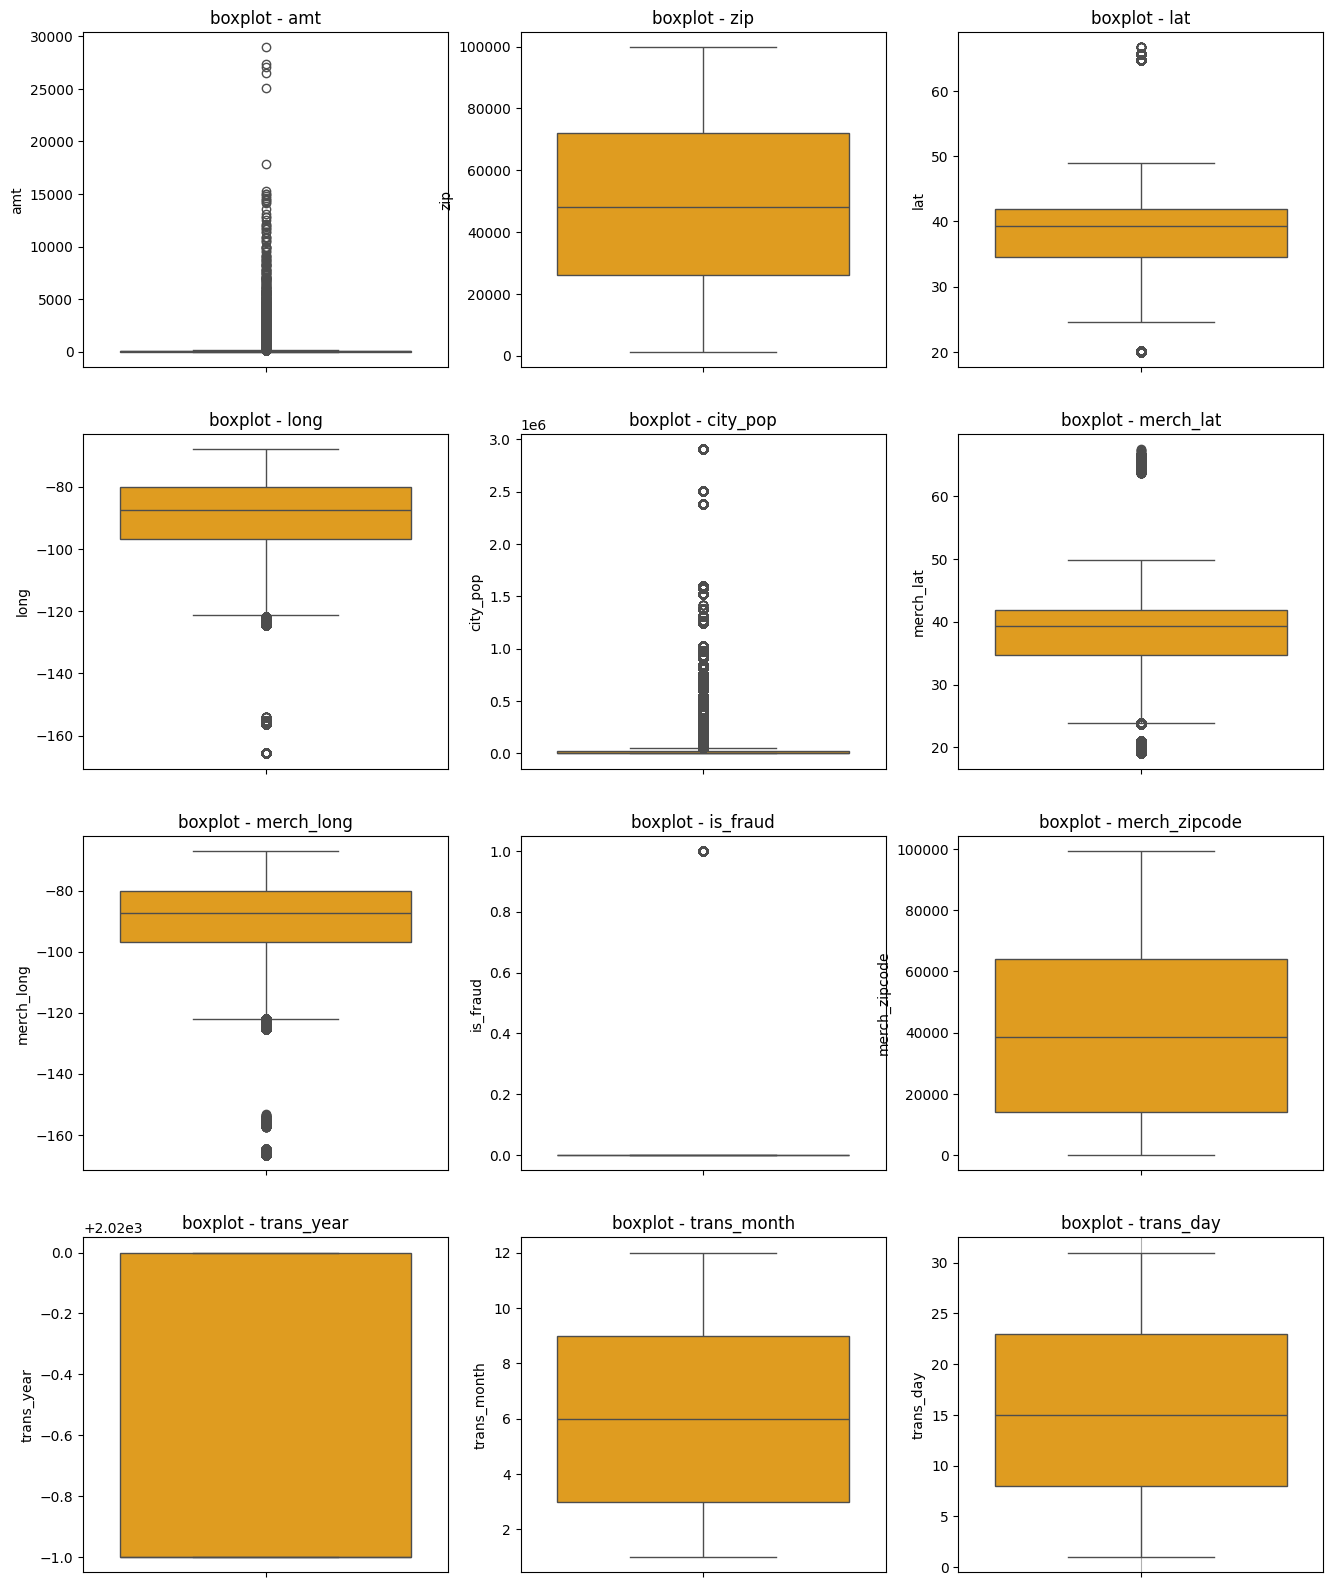

In [27]:
fig, axes = plt.subplots(4, 3, figsize=(16,20))
for num_col, ax in zip(num_cols[1:], axes.flatten()):
    sns.boxplot(data[num_col], ax=ax, color='orange')
    ax.set_title(f'boxplot - {num_col}')
    plt.grid()
plt.show()

Значения сумм транзакци (`amt`) наблюдаются  выбросы, но мы на данном этапе рассматриваем их оставить.
Необходимо изучить природу выбросов и оценить необходимость исключения выбросов.

Проанализируем поведение каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом).

Визуализируем попарные распределения признаков (sns.pairplot()) и построим корреляции наиболее значимых

In [28]:
data.corr(numeric_only=True)

cc_num       amt       zip       lat      long  city_pop  \
cc_num         1.000000  0.001769  0.041459 -0.059271 -0.048278 -0.008991   
amt            0.001769  1.000000  0.001843 -0.001926 -0.000187  0.005818   
zip            0.041459  0.001843  1.000000 -0.114290 -0.909732  0.078467   
lat           -0.059271 -0.001926 -0.114290  1.000000 -0.015533 -0.155730   
long          -0.048278 -0.000187 -0.909732 -0.015533  1.000000 -0.052715   
city_pop      -0.008991  0.005818  0.078467 -0.155730 -0.052715  1.000000   
merch_lat     -0.058942 -0.001873 -0.113561  0.993592 -0.015452 -0.154781   
merch_long    -0.048252 -0.000151 -0.908924 -0.015509  0.999120 -0.052687   
is_fraud      -0.000981  0.219404 -0.002162  0.001894  0.001721  0.002136   
merch_zipcode  0.041321  0.000650  0.605024 -0.109120 -0.477844  0.056029   
trans_year     0.000466  0.000842  0.000086  0.001274  0.000191 -0.001673   
trans_month   -0.000281 -0.001748  0.000852 -0.001072 -0.001213  0.000137   
trans_day      0.000545  0.000629 -0.000607 -0.000138  0.000031  0.000159   
age           -0.000291 -0.009748  0.011004  0.047845 -0.030231 -0.091271   

               merch_lat  merch_long  is_fraud  merch_zipcode  trans_year  \
cc_num         -0.058942   -0.048252 -0.000981       0.041321    0.000466   
amt            -0.001873   -0.000151  0.219404       0.000650    0.000842   
zip            -0.113561   -0.908924 -0.002162       0.605024    0.000086   
lat             0.993592   -0.015509  0.001894      -0.109120    0.001274   
long           -0.015452    0.999120  0.001721      -0.477844    0.000191   
city_pop       -0.154781   -0.052687  0.002136       0.056029   -0.001673   
merch_lat       1.000000   -0.015431  0.001741      -0.106868    0.001244   
merch_long     -0.015431    1.000000  0.001721      -0.478661    0.000184   
is_fraud        0.001741    0.001721  1.000000      -0.002392    0.003004   
merch_zipcode  -0.106868   -0.478661 -0.002392       1.000000    0.001055   
trans_year      0.001244    0.000184  0.003004       0.001055    1.000000   
trans_month    -0.001116   -0.001197 -0.012409       0.000220   -0.464879   
trans_day      -0.000276    0.000076  0.003848      -0.000339   -0.045759   
age             0.047458   -0.030154  0.012378       0.022674   -0.004414   

               trans_month  trans_day       age  
cc_num           -0.000281   0.000545 -0.000291  
amt              -0.001748   0.000629 -0.009748  
zip               0.000852  -0.000607  0.011004  
lat              -0.001072  -0.000138  0.047845  
long             -0.001213   0.000031 -0.030231  
city_pop          0.000137   0.000159 -0.091271  
merch_lat        -0.001116  -0.000276  0.047458  
merch_long       -0.001197   0.000076 -0.030154  
is_fraud         -0.012409   0.003848  0.012378  
merch_zipcode     0.000220  -0.000339  0.022674  
trans_year       -0.464879  -0.045759 -0.004414  
trans_month       1.000000   0.012434  0.002213  
trans_day         0.012434   1.000000  0.000570  
age               0.002213   0.000570  1.000000

<Axes: >

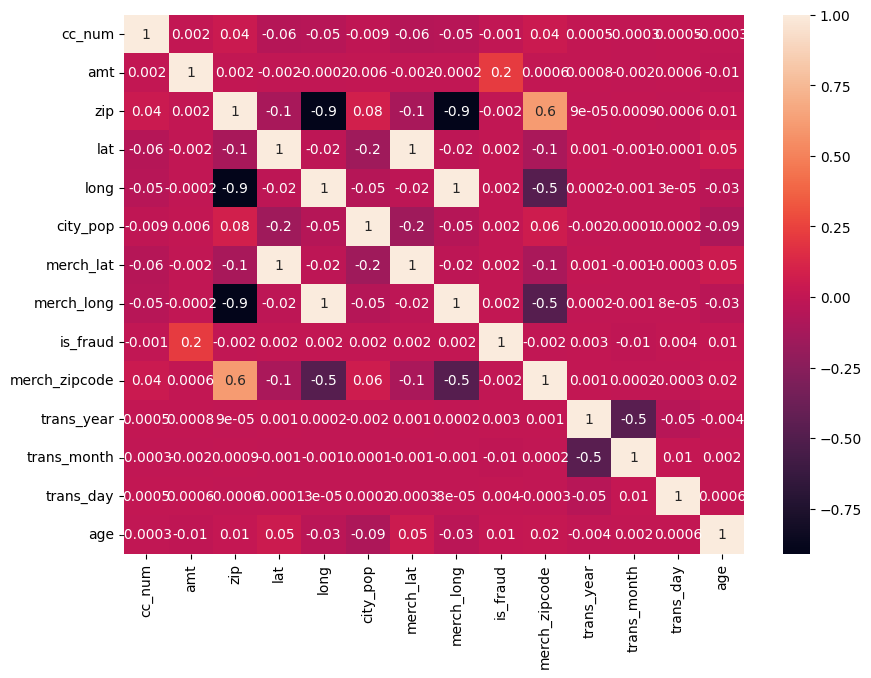

In [29]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.1g')

Рассчитанная таблица корреляций и построенная тепловая карта отражают коррелицию только географических координат: merch_long - zip, merch_long - merch_zipcode, merch_zipcode - long, lon - zip.

С целевой переменной явной связи не обнаружено. Можно отметить очень слабую корреляцию с суммoй транзакции (`amt`).

In [30]:
# видна связь merch_long - zip, merch_long - merch_zipcode, merch_zipcode - long, lon - zip
# Иными словами коллериют между собой географические координаты
# С Целевой переменной явной связи не обнаружено (очень слабая c amt(суммой транзакции))

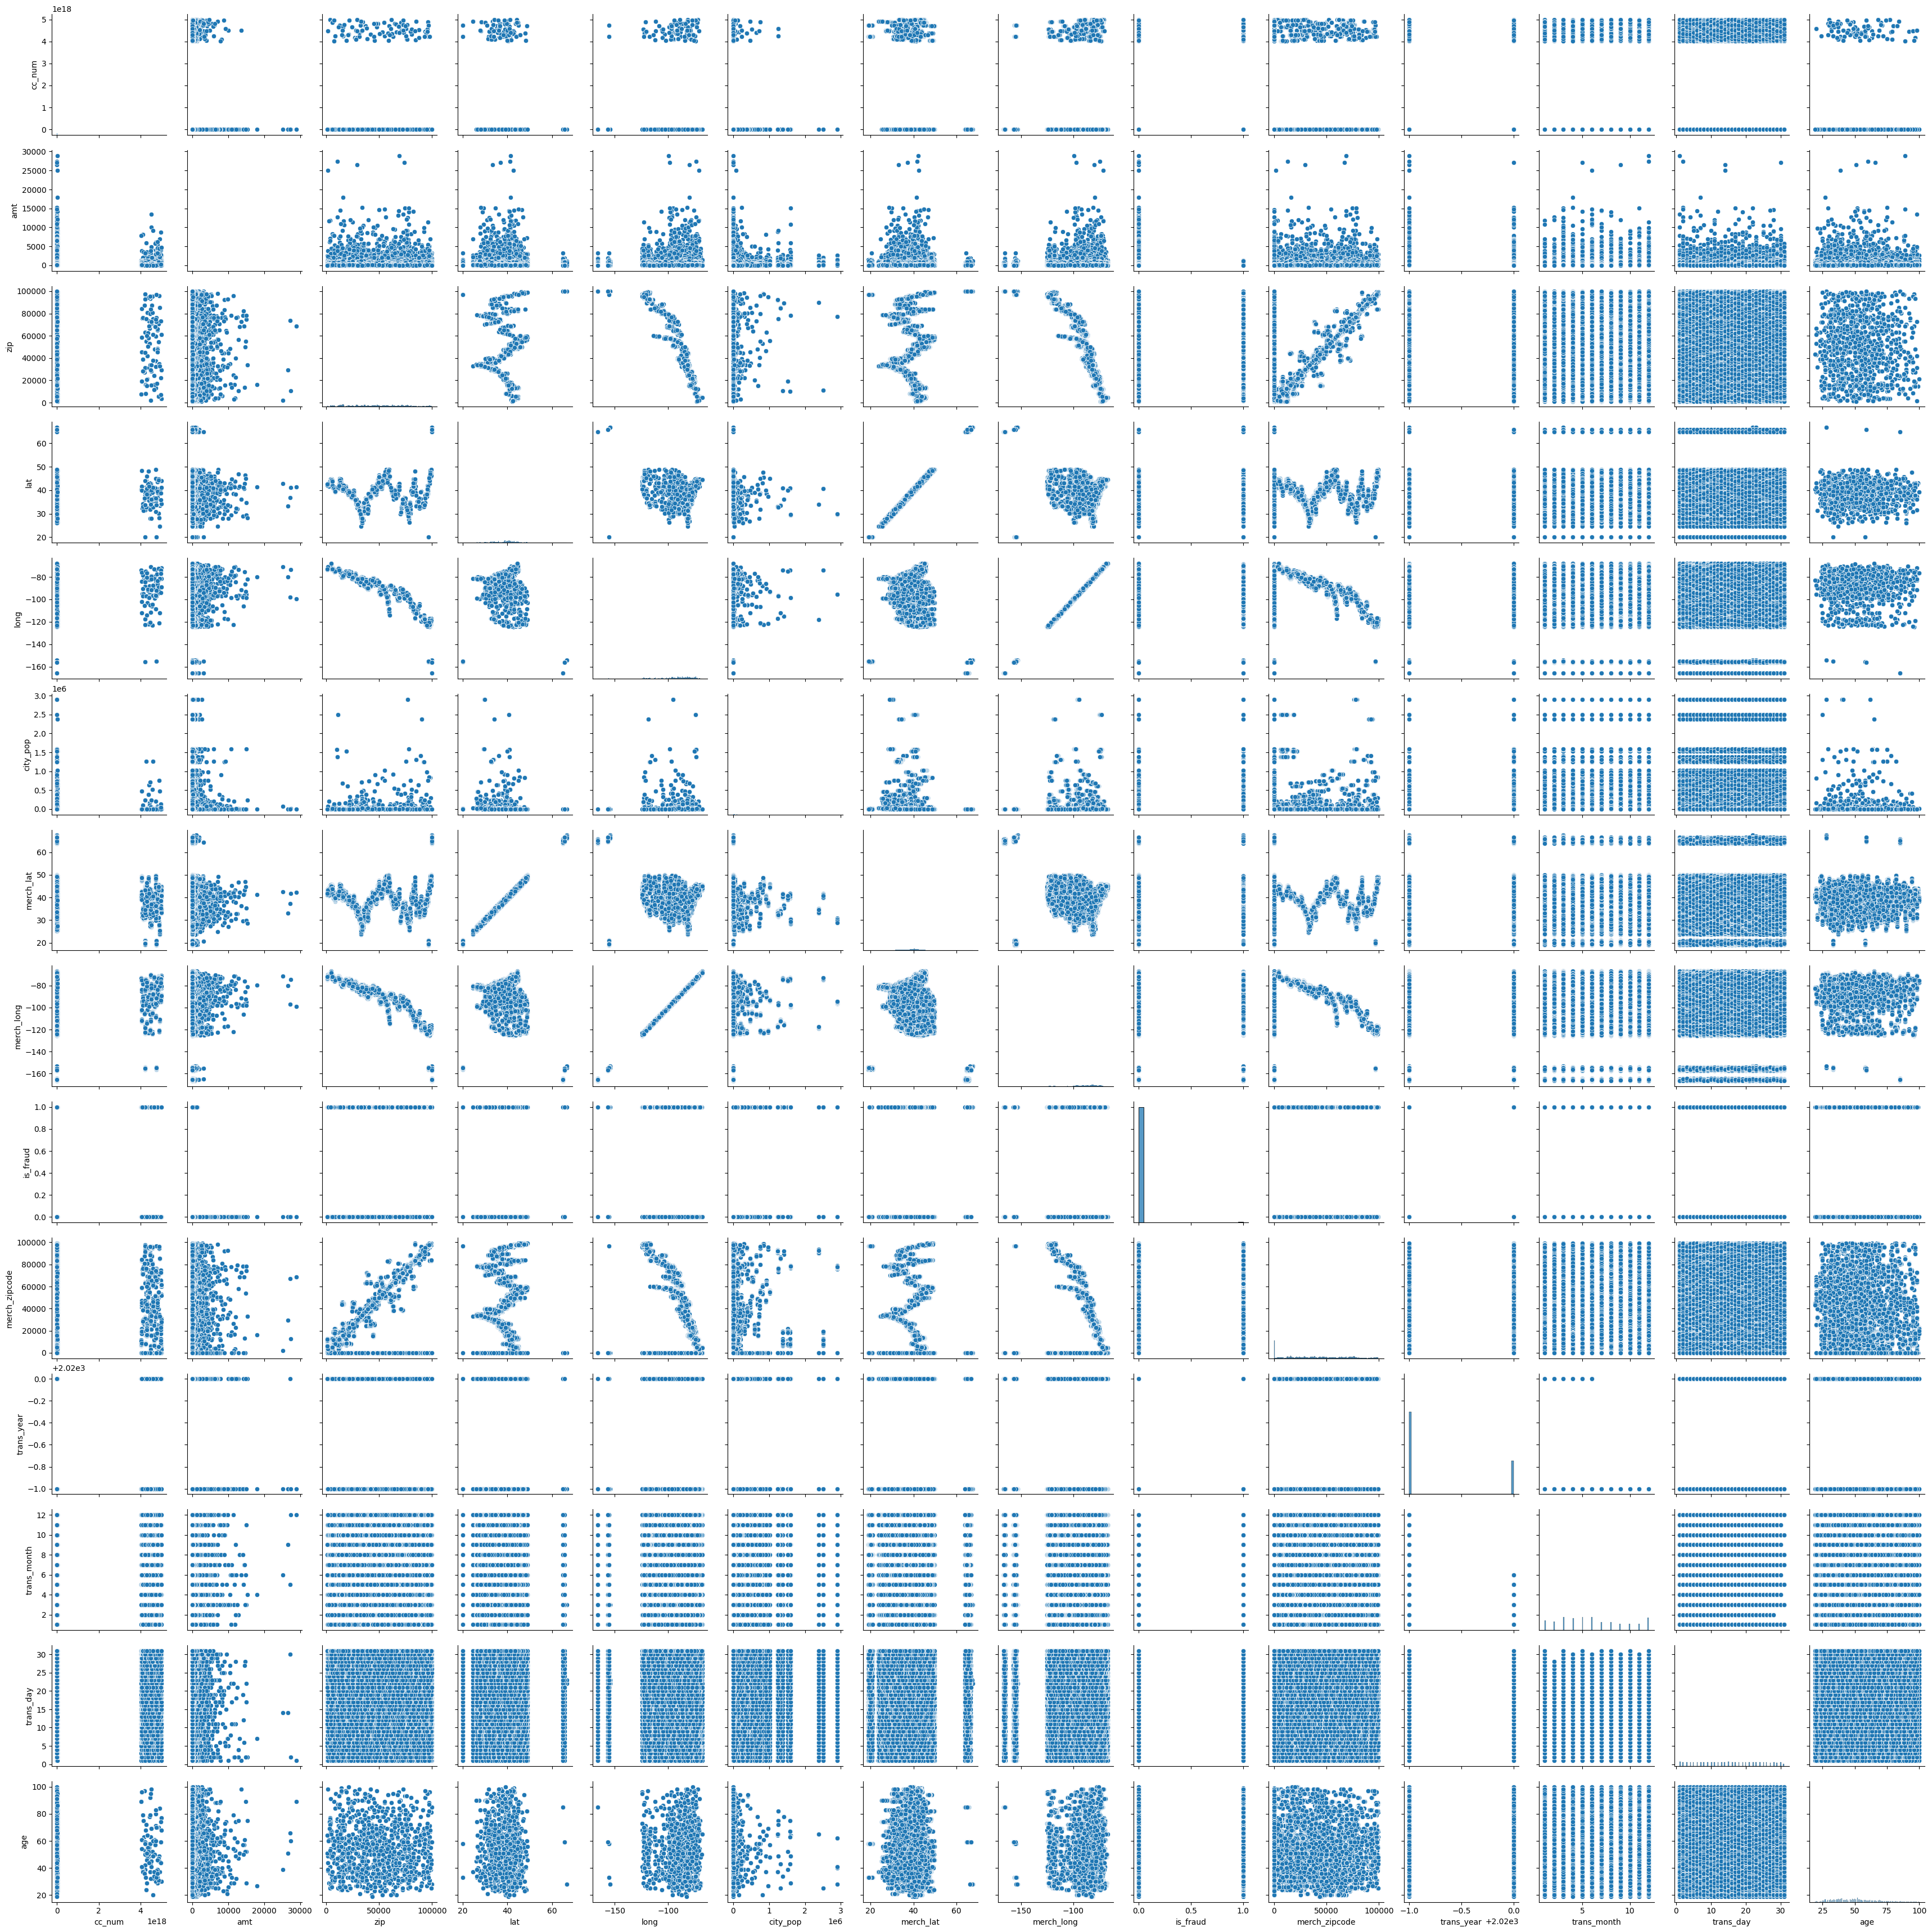

In [31]:
sns.pairplot(data)

Исследуем признаки.

**Признак `is_fraud`**

In [32]:
data['is_fraud'].value_counts() # распределение target

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [33]:
percentages = data['is_fraud'].value_counts(normalize=True) * 100
percentages

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

Соотношение между числом мошеннических  и обычных транзакций составляет 1% к 99%, что можно сделать вывод о дисбалансе классов.

**Признак `category`**

In [34]:
data.groupby(by=['category'])['amt'].sum().sort_values(ascending=False) # в каких категориях тратят больше денег

category
grocery_pos       14460822.38
shopping_pos       9307993.61
shopping_net       8625149.68
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
travel             4516721.68
personal_care      4353450.53
grocery_net        2439412.68
Name: amt, dtype: float64

In [35]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].sum().sort_values(ascending=False) # в каких категориях больше теряют денег

category
shopping_net      1711723.71
shopping_pos       739245.09
misc_net           729266.76
grocery_pos        543797.90
entertainment      117323.79
misc_pos            54571.02
home                50971.66
food_dining         18131.62
gas_transport        7594.11
personal_care        5757.52
kids_pets            4331.08
health_fitness       2693.04
grocery_net          1629.82
travel               1051.49
Name: amt, dtype: float64

In [36]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].count().sort_values(ascending=False) # Всего операций по каждой категрии где is_fruad == 1

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: amt, dtype: int64

**Признак `gender`**

In [37]:
data[data['is_fraud'] == 1].groupby(by=['gender'])['amt'].count() # общее количество мошеннеческих транзакций равномерно распределенно по полу

gender
F    3735
M    3771
Name: amt, dtype: int64

**Признак `state`**

In [38]:
data[data['is_fraud'] == 1].groupby(by=['state'])['amt'].count().sort_values(ascending=False).head(10) # колл-во мошен. тр. по штату
# Предполагаем, что это связано с тем что NY и TX самые густо населённые и там соответственно больше всего транзакций

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: amt, dtype: int64

In [39]:
(data[data['is_fraud'] == 1].groupby(by=['state'])['amt'].count()/data['amt'].count()).sort_values(ascending=False).head(10)
# доля мош.тр. среди всех тр. по штатам

state
NY    0.000428
TX    0.000369
PA    0.000353
CA    0.000251
OH    0.000248
FL    0.000217
IL    0.000191
MI    0.000184
AL    0.000166
MN    0.000160
Name: amt, dtype: float64

**Признак `city`**

In [40]:
data[data['is_fraud'] == 1].groupby(by=['city'])['amt'].count().sort_values(ascending=False).head(10)# колл-во мошен. тр. по городу

city
Houston       39
Warren        33
Naples        29
Huntsville    29
Topeka        27
Tulsa         27
Dallas        27
Detroit       26
Randolph      25
Utica         25
Name: amt, dtype: int64

In [41]:
(data[data['is_fraud'] == 1].groupby(by=['city'])['amt'].count()/data['amt'].count()).sort_values(ascending=False).head(10)
# доля мош.тр. среди всех тр. по городам

city
Houston       0.000030
Warren        0.000025
Naples        0.000022
Huntsville    0.000022
Topeka        0.000021
Tulsa         0.000021
Dallas        0.000021
Detroit       0.000020
Randolph      0.000019
Utica         0.000019
Name: amt, dtype: float64

Предполагаем, что количество мошеннических транзакций больше в тех штатах/городах где больше объем транзакций в целом. Исключения требуют отдельного исследования

**Признак name**

In [42]:
data[data['is_fraud'] == 1].groupby(by=['name'])['amt'].count().sort_values(ascending=False).head(10)# колл-во мошен. тр. по name

name
Scott Martin         27
Jennifer Scott       26
Robert James         22
Susan Garcia         20
Linda Davis          20
Chelsea Silva        19
Micheal Walters      19
Christine Johnson    18
Whitney Gallagher    18
Paula Estrada        16
Name: amt, dtype: int64

In [43]:
data[data['is_fraud'] == 0].groupby(by=['name'])['amt'].count().sort_values(ascending=False).head(10)# всего не фрод тр. по name

name
Scott Martin        4591
Jeffrey Smith       3584
Monica Cohen        3123
Ana Howell          3117
Keith Sanders       3113
Barbara Taylor      3113
Jessica Perez       3112
Tammy Ayers         3110
Rebecca Erickson    3099
Christine Harris    3097
Name: amt, dtype: int64

In [44]:
data[data['name'] == 'Chelsea Silva'].count()

cc_num           19
merchant         19
category         19
amt              19
gender           19
street           19
city             19
state            19
zip              19
lat              19
long             19
city_pop         19
job              19
dob              19
merch_lat        19
merch_long       19
is_fraud         19
merch_zipcode    19
name             19
trans_year       19
trans_month      19
trans_day        19
trans_time       19
age              19
dtype: int64

Видим зависимость, что количество фрод тразакций зависит от количества транзакций в целом, которые проводит клиент. Больше транзакций - больше фрода, но есть исключения 'Chelsea Silva' - все транзакции - фрод.

**Признак `amt`**

In [45]:
data[data['is_fraud'] == 1]['amt'].mean() # сколько в среднем теряется денег за одну мош. тр.

531.3200919264589

In [46]:
data[data['is_fraud'] == 1]['amt'].median() # медианное значение за одну мош.тр.

396.505

Оценим время суток, когда производятся транзакции.

In [47]:
from datetime import time # добавим колонки: morning, midday, evening, night - часть дня когда была сделана транзакция
data['morning'] = np.where((time(6,0,0) <= data['trans_time']) & (data['trans_time'] <= time(12,0,0)), 1, 0)
data['midday'] = np.where((time(12,0,0) < data['trans_time']) & (data['trans_time'] <= time(18,0,0)), 1, 0)
data['evening'] = np.where((time(18,0,0) < data['trans_time']) & (data['trans_time'] <= time(23,59,59)), 1, 0)
data['night'] = np.where((time(0,0,0) <= data['trans_time']) & (data['trans_time'] < time(6,0,0)), 1, 0)

In [48]:
data[data['is_fraud'] == 1][['morning', 'midday', 'evening', 'night']].value_counts() # большинство мош. тр. делается вечером с 18:00 до 00:00
# следом кол-во мош.тр. ночью - 00:00 до 06:00.

morning  midday  evening  night
0        0       1        0        4133
                 0        1        2633
         1       0        0         466
1        0       0        0         274
Name: count, dtype: int64

Большинство мошеннических транзакций осуществляется вечером с 18:00 до 00:00 и далее значительное число наблюдается ночью с 00:00 до 06:00.


Построим графики распределения по признакам.

<ipython-input-49-a962bf56ffd5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='category', palette='viridis')


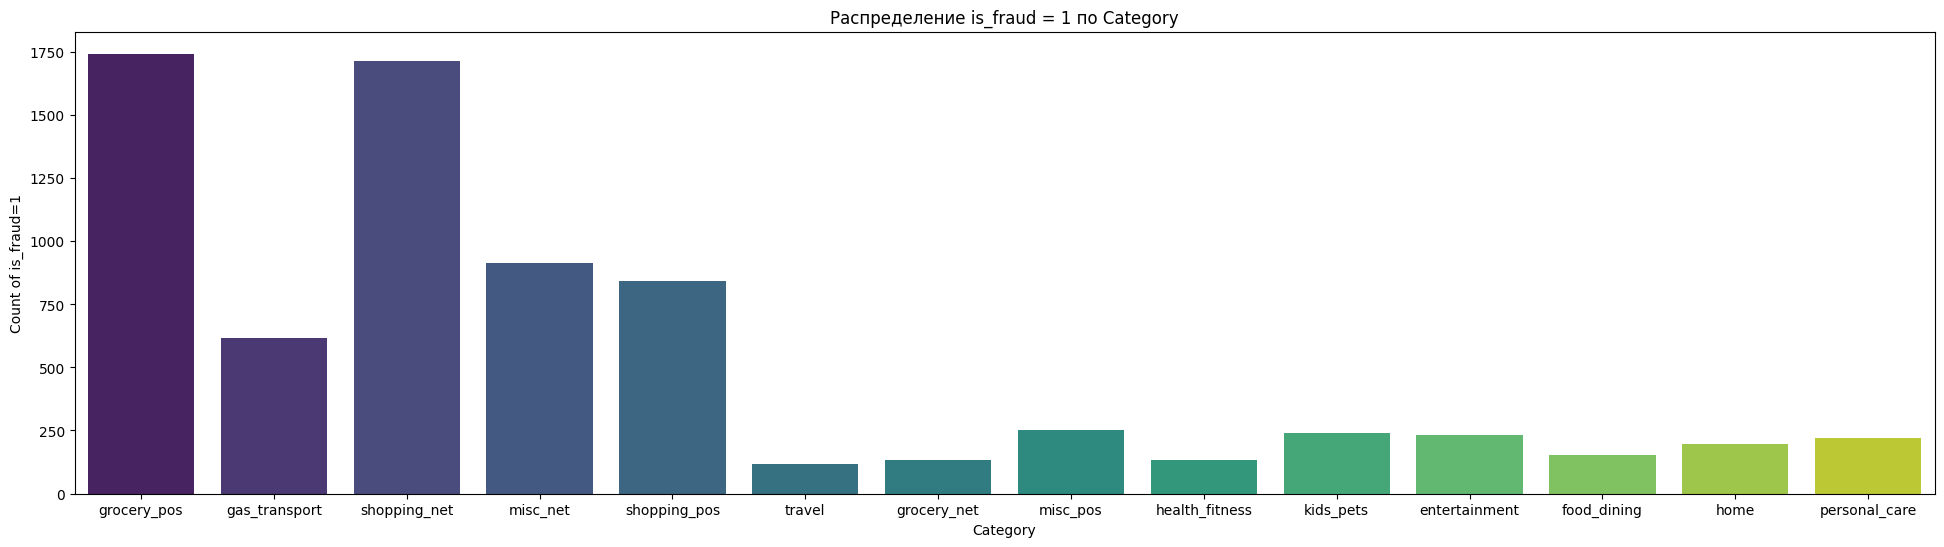

In [49]:
data['is_fraud'] = data['is_fraud'].astype(int)

# Фильтрация для получения только тех строк, где is_fraud равно 1
df_filtered = data.loc[data['is_fraud'] == 1, ]

# Построение графика распределения f по category
plt.figure(figsize=(24, 6))
sns.countplot(data=df_filtered, x='category', palette='viridis')
plt.title('Распределение is_fraud = 1 по Category')
plt.xlabel('Category')
plt.ylabel('Count of is_fraud=1')
plt.show()

<ipython-input-50-5502bf9b0745>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='category', y='percentage', palette='viridis')


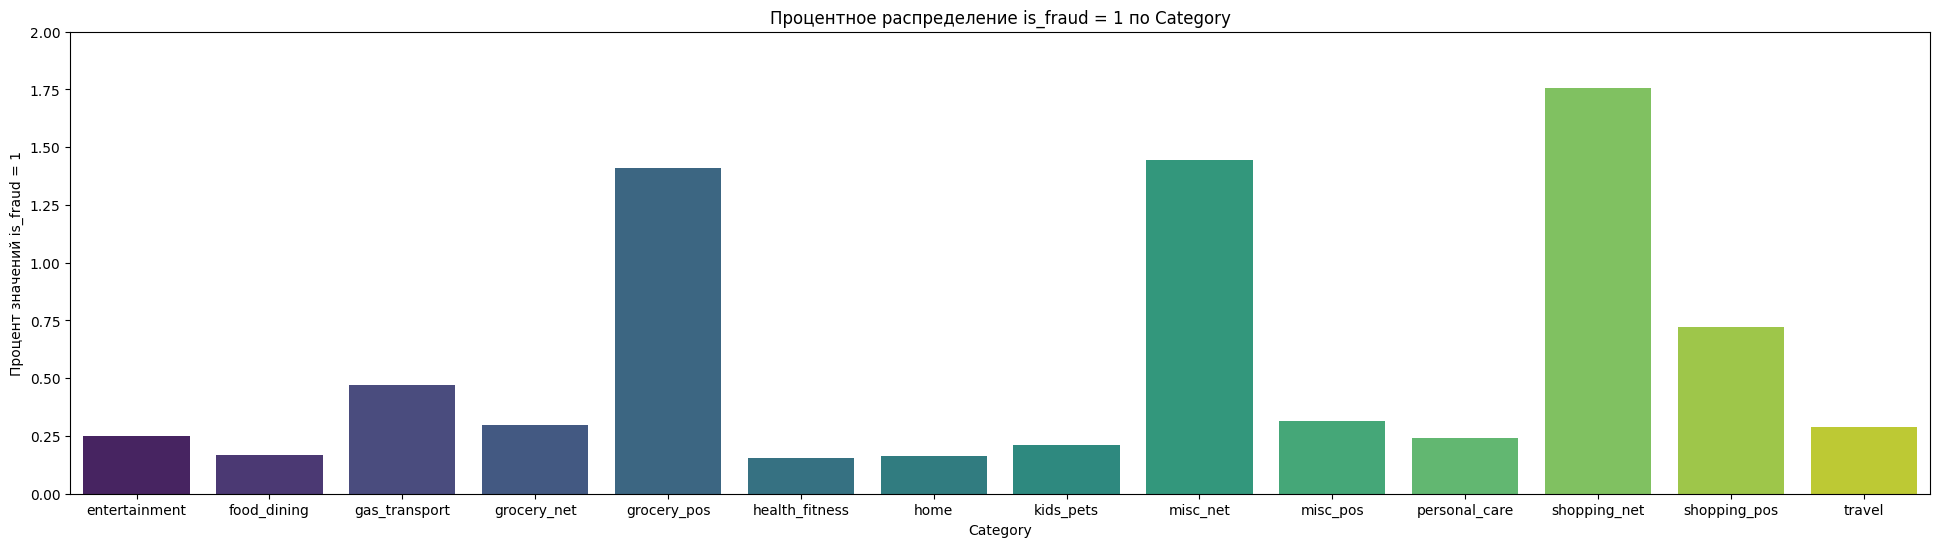

In [50]:
# Группировка по category и подсчет процентного соотношения значений is_fraud = 1
category_distribution = data.groupby('category')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['category', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='category', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по Category')
plt.xlabel('Category')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 2)
plt.show()

<ipython-input-51-17a020ade3a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='gender', palette='viridis')


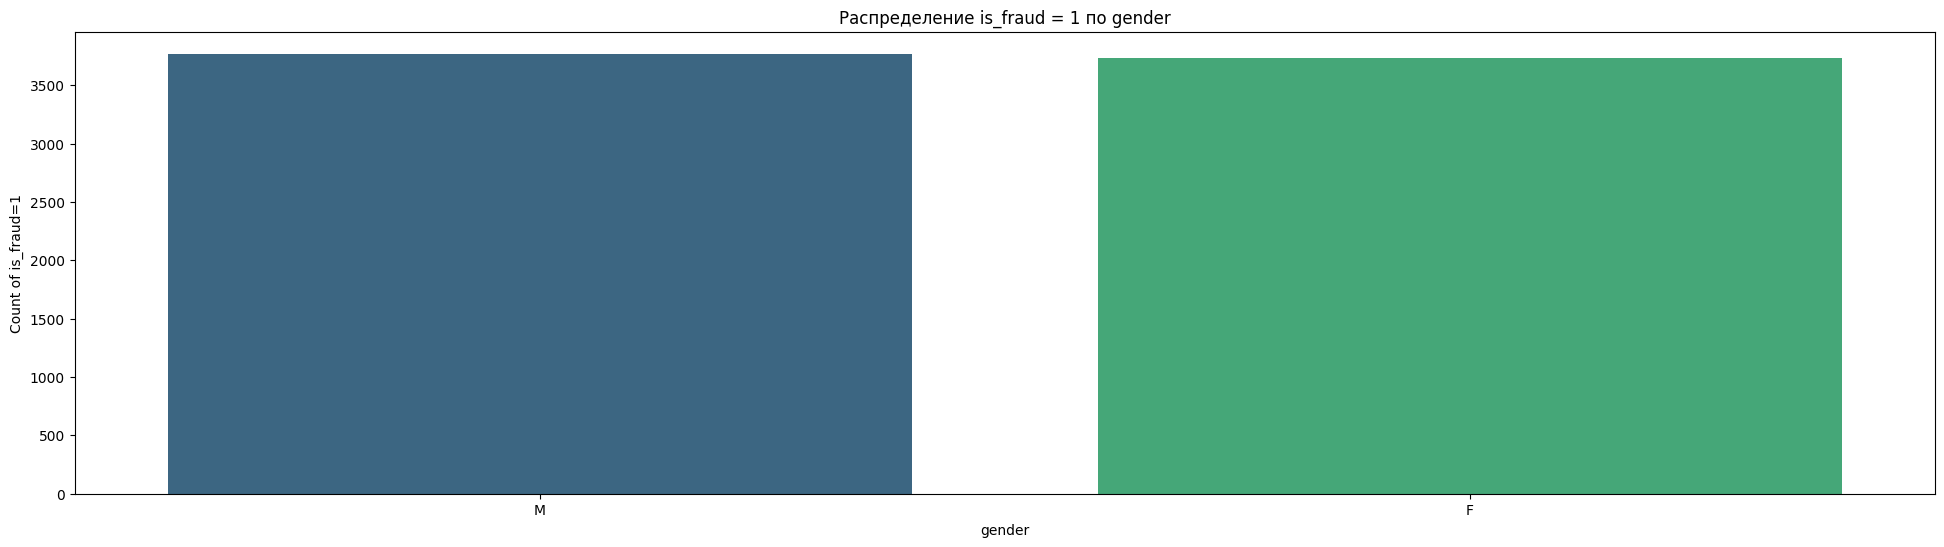

In [51]:
# Фильтрация для получения только тех строк, где is_fraud равно 1
df_filtered = data.loc[data['is_fraud'] == 1, ]

# Построение графика распределения f по category
plt.figure(figsize=(24, 6))
sns.countplot(data=df_filtered, x='gender', palette='viridis')
plt.title('Распределение is_fraud = 1 по gender')
plt.xlabel('gender')
plt.ylabel('Count of is_fraud=1')
plt.show()

<ipython-input-52-dbcb002a88f0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='gender', y='percentage', palette='viridis')


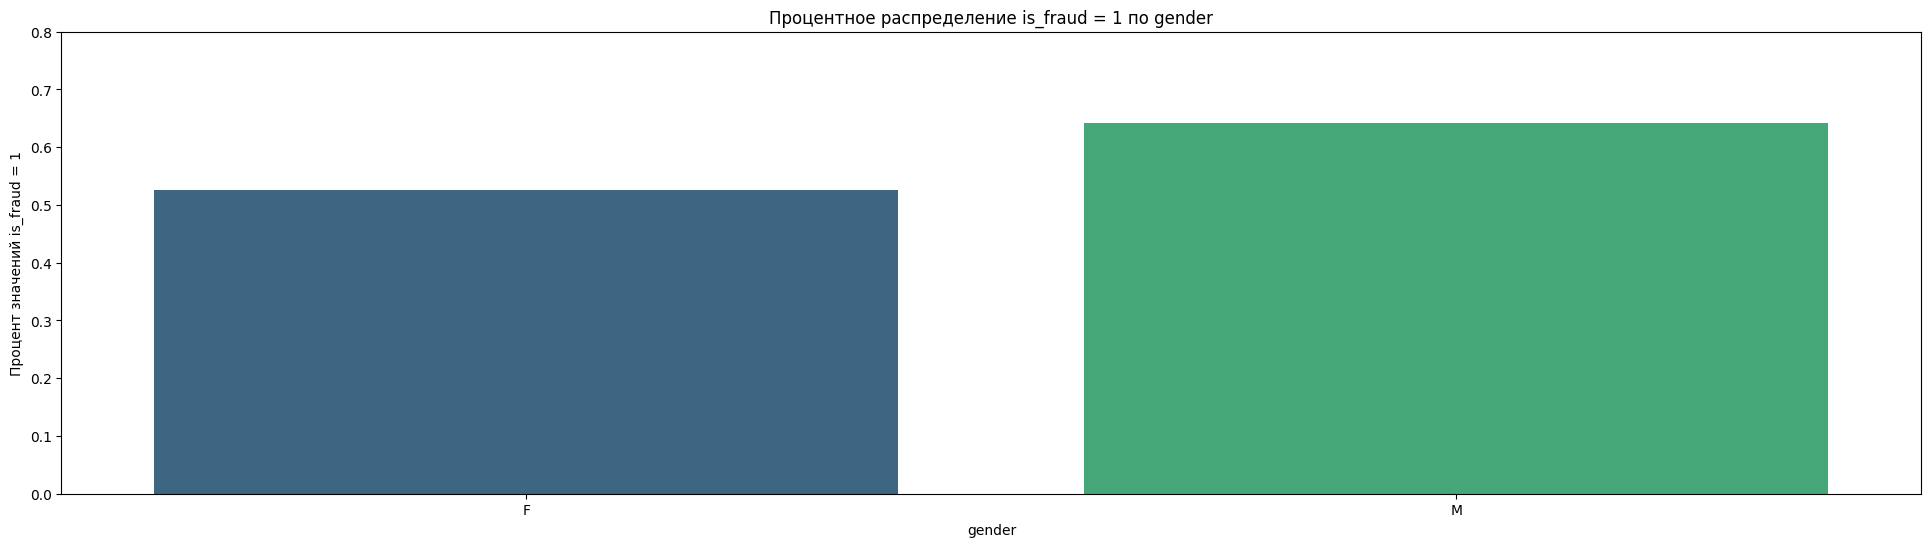

In [52]:
# Группировка по category и подсчет процентного соотношения значений is_fraud = 1
category_distribution = data.groupby('gender')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['gender', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='gender', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по gender')
plt.xlabel('gender')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 0.8)
plt.show()

<ipython-input-53-b8978d555d5b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='hour', y='percentage', palette='viridis')


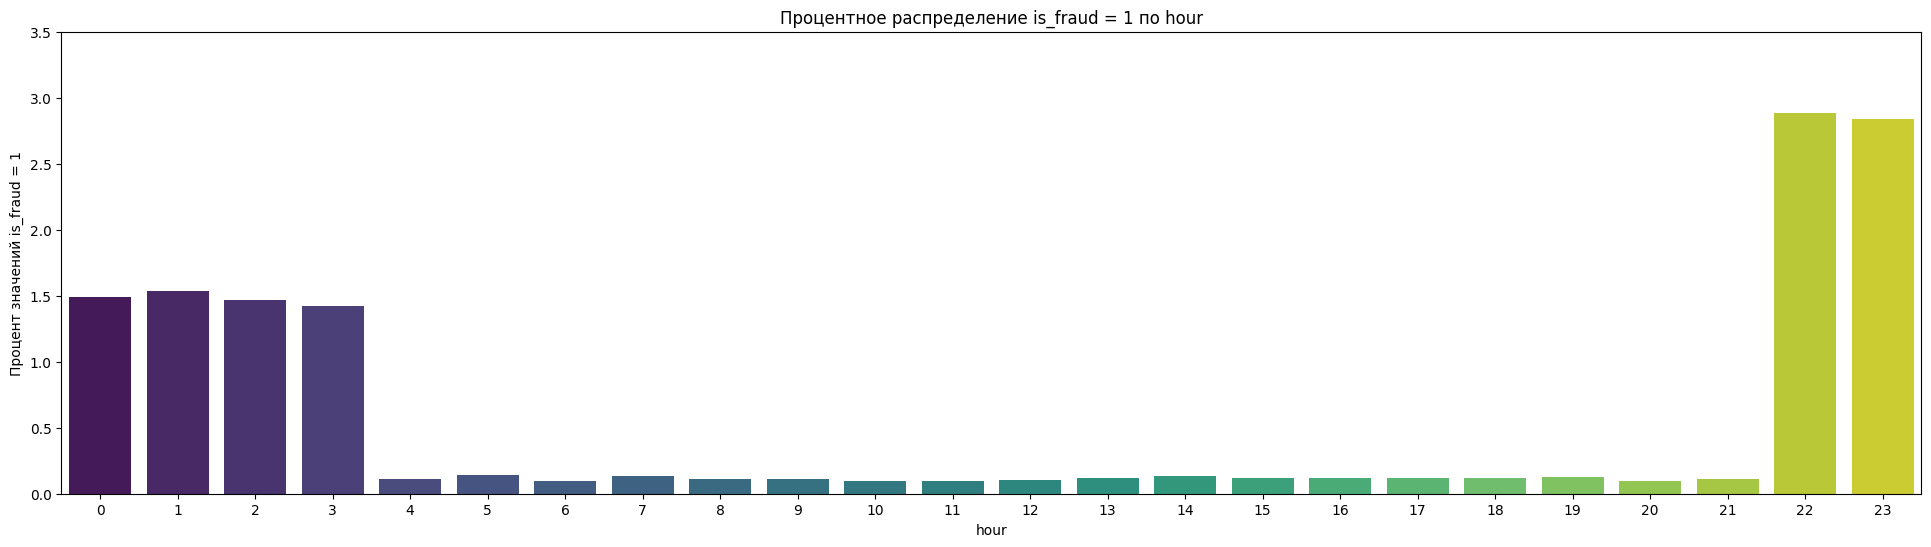

In [53]:

data['hour'] = data['trans_time'].apply(lambda x: x.hour)


category_distribution = data.groupby('hour')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['hour', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='hour', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по hour')
plt.xlabel('hour')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 3.5)
plt.show()

<ipython-input-54-004ce52eccfb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='trans_month', y='percentage', palette='viridis')


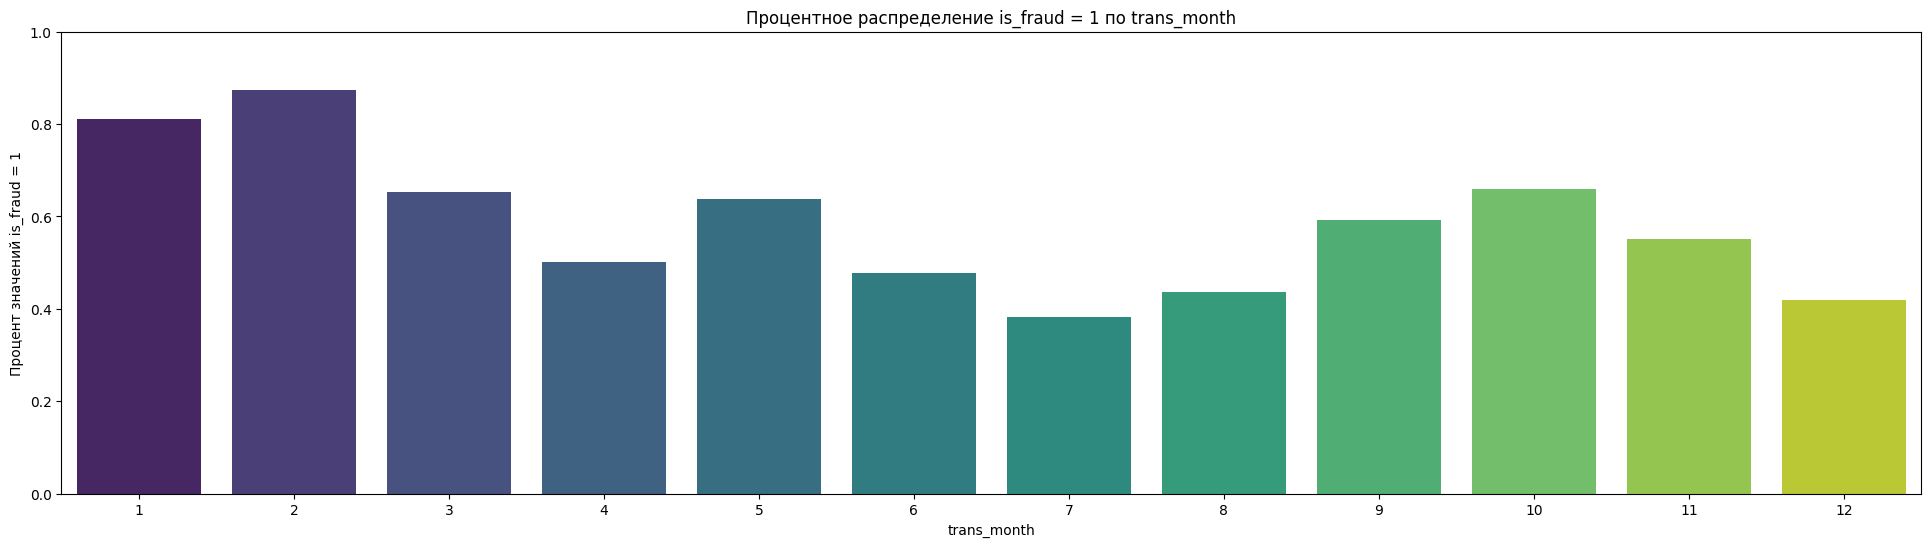

In [54]:

category_distribution = data.groupby('trans_month')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['trans_month', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='trans_month', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по trans_month')
plt.xlabel('trans_month')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 1)
plt.show()

In [55]:
# Подсчет повторений для каждого значения в столбце 'name'
count_series = data['name'].value_counts()

# Создание нового столбца с количеством повторений
data['name_count'] = data['name'].map(count_series)
data

cc_num                             merchant  \
0           2703186189652095           fraud_Rippin, Kub and Mann   
1               630423337322      fraud_Heller, Gutmann and Zieme   
2             38859492057661                 fraud_Lind-Buckridge   
3           3534093764340240   fraud_Kutch, Hermiston and Farrell   
4            375534208663984                  fraud_Keeling-Crist   
...                      ...                                  ...   
1296670       30263540414123                    fraud_Reichel Inc   
1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt   

              category     amt gender                         street  \
0             misc_net    4.97      F                 561 Perry Cove   
1          grocery_pos  107.23      F   43039 Riley Greens Suite 393   
2        entertainment  220.11      M       594 White Dale Suite 530   
3        gas_transport   45.00      M    9443 Cynthia Court Apt. 038   
4             misc_pos   41.96      M               408 Bradley Rest   
...                ...     ...    ...                            ...   
1296670  entertainment   15.56      M       162 Jessica Row Apt. 072   
1296671    food_dining   51.70      M  8617 Holmes Terrace Suite 651   
1296672    food_dining  105.93      M     1632 Cohen Drive Suite 639   
1296673    food_dining   74.90      M           42933 Ryan Underpass   
1296674    food_dining    4.30      M           135 Joseph Mountains   

                             city state    zip      lat      long  city_pop  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1                          Orient    WA  99160  48.8878 -118.2105       149   
2                      Malad City    ID  83252  42.1808 -112.2620      4154   
3                         Boulder    MT  59632  46.2306 -112.1138      1939   
4                        Doe Hill    VA  24433  38.4207  -79.4629        99   
...                           ...   ...    ...      ...       ...       ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                       job        dob  merch_lat  merch_long  \
0                Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1        Special educational needs teacher 1978-06-21  49.159047 -118.186462   
2              Nature conservation officer 1962-01-19  43.150704 -112.154481   
3                          Patent attorney 1967-01-12  47.034331 -112.561071   
4           Dance movement psychotherapist 1986-03-28  38.674999  -78.632459   
...                                    ...        ...        ...         ...   
1296670                       Geoscientist 1961-11-24  36.841266 -111.690765   
1296671   Production assistant, television 1979-12-11  38.906881  -78.246528   
1296672                    Naval architect 1967-08-30  33.619513 -105.130529   
1296673              Volunteer coordinator 1980-08-18  42.788940 -103.241160   
1296674           Therapist, horticultural 1995-08-16  46.565983 -114.186110   

         is_fraud  merch_zipcode                   name  trans_year  \
0               0        28705.0         Jennifer Banks        2019   
1               0           -1.0         Stephanie Gill        2019   
2               0        83236.0         Edward Sanchez        2019   
3               0           -1.0           Jeremy White        2019   
4               0        22844.0           Tyler Garcia        

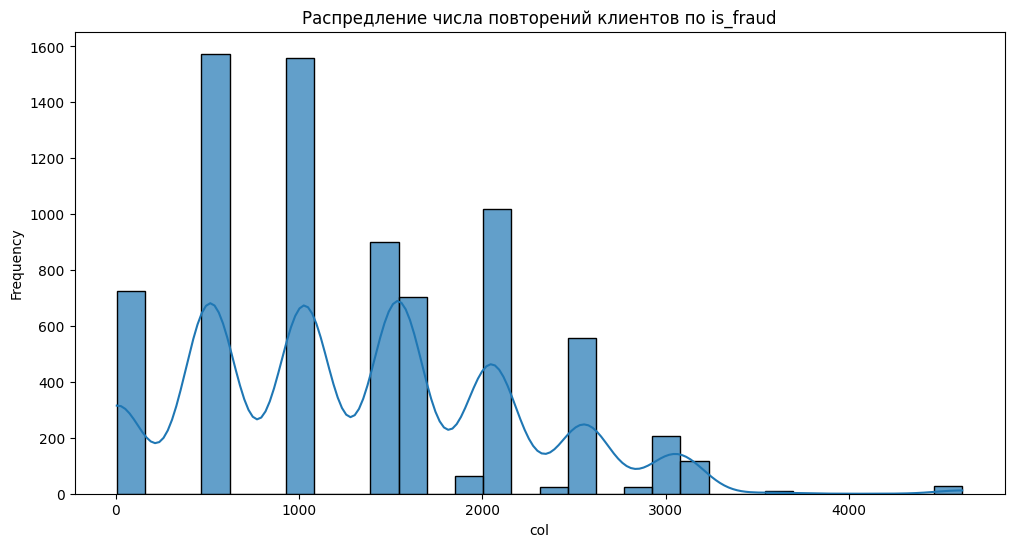

In [56]:
#groups = data.groupby('is_fraud')
plt.figure(figsize=(12, 6))
#ax.tick_params(axis='x', labelrotation=20)
sns.histplot(data=data.loc[data['is_fraud']==1, ], x='name_count',   bins=30, alpha=0.7, kde=True)
plt.title('Распредление числа повторений клиентов по is_fraud')
plt.xlabel('col')
plt.ylabel('Frequency')
plt.grid()


plt.grid()
plt.show()

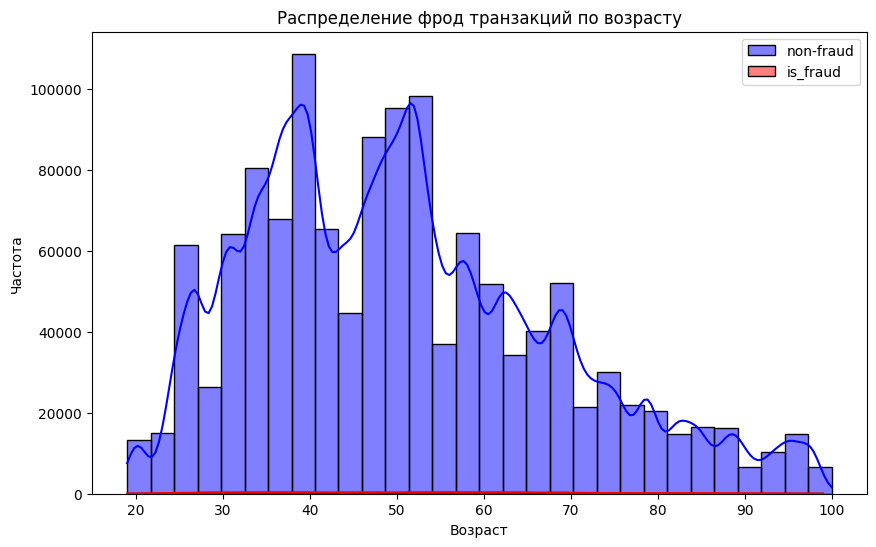

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['is_fraud'] == 0]['age'], bins=30, kde=True, color='blue', label='non-fraud')
sns.histplot(data[data['is_fraud'] == 1]['age'], bins=30, kde=True, color='red', label='is_fraud')
plt.legend()
plt.title('Распределение фрод транзакций по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Из распредлений видим, что фродовые р-транзакции в основном распредлены в категориях "grosery pos", "shopping_net" и "misc_net". Фродовые транзацкии в основном совершаются ночью с 22 до 3 часов и зимой. Распредление фрод транзакций по полу и возрастку в целом равномерно.

## Общий вывод

- Проведено исследование по данным банковских транзакций, о времени транзакции, суммах и связанные с ними личные данные и данные продавца.

- Выполнена предобработка данных:

    1) Исследованы и заполнены пропуски. Задача в дальнейшем будет доизучаться с целью более точного определения пропущенных значений;

    2) Изучены типы данных, изменены и даны пояснения к изменениям.
    Проанализированы уникальные наименования, проверены дубликаты.

    3) В проекте произведена подготовка параметров для проведения анализа: рассчитан возраст клиента, выделены временные параметры даты транзакций (год, месяц, день, время суток).

- Проведённый анализ позволяет сделать следующие выводы:

* распределение целевой переменной - 1289169(нормальные) и 7506(мошеннеческие). Можно отметить дисбаланс классов.

* большинство мошеннических транзакций осуществляется  вечером - между 18 и 24 часами и также с 00 часов до 06 утра;

* распределение мошеннических транзакций по полу равномерное

* медианная сумма кражи денег за одну транзакцию - 396, среднее - 531

* больше всего мошеннических транзакций в категориях покупок - grocery_pos,  shopping_net, misc_net

* по доле мошеннических транзакций среди общего кол-ва лидируют штаты: NY, TX, PA

* по доле мошеннечиских транзакций среди общего кол-ва лидируют города: Houston, Warren, Naples

* по доле мошеннических транзакций среди общего кол-ва транзакций на клиента - Chelsea Silva

В течение всего проекта выявлялись моменты, когда можно сделать еще более детальный анализ по группам - транзакциям, возрасту, времени суток и т.д., чтобы оценить особенности более четко.

Поэтому можно предложить дальнейшее исследование факторов и взаимосвязи в рамках признаков, что даст более точное представление о прогнозе мошеннической операции для конкретного клиента.

Предложения для дальнейшей доработки:
- Заполнение merch_zipcode через geopy
- Изучение информации по картам (МСП/банки) через bin checker
- Изучение основных фрод локаций (города/штаты)
- Изучение основных фродеров

**Ниже наброски на будущие этапы **


In [58]:
""" Закоментил для будущей проработки

from datetime import datetime
ts = int('1325376186') # 1546300986
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

SyntaxError: incomplete input (<ipython-input-58-680e60d1d830>, line 1)

In [ ]:
""" Закоментил для будущей проработки

# unix_time не сходится с trans_date_trans_time. Отличия на 7 лет

In [ ]:
""" Закоментил для будущей проработки
!pip install geopy

In [ ]:

""" Закоментил для будущей проработки

import asyncio
from geopy.geocoders import Nominatim
import time

async def getzipcode(geoloc, coords, n):
    postcodes = []
    for c in coords:
        try:
            location = geoloc.reverse(f"{c[0]}, {c[1]}", addressdetails=True)
            # time.sleep(1)
            if location:
                zip_code = location.raw.get('address').get('postcode')
                if zip_code:
                    postcodes.append((zip_code, c[0], c[1]))
                    print(f' - task{n} --  ', zip_code)
                else:
                    print(f' - task{n} --  ', 0)
            else:
                print(f' - task{n} --  location NAN')
        except: print('что-то на этом этапе пошло не так')
        finally: continue
    return postcodes

async def main(coords):
    tasks = [getzipcode(Nominatim(user_agent=f"my_app{i}"), coord, i) for i, coord in zip(range(10), np.array_split(coords, 10))]
    results =  await asyncio.gather(*tasks)
    return results

coords = data[data['merch_zipcode'].isnull()][['merch_lat', 'merch_long']].values

# postcodes = getzipcode(coords)
postcodes = await main(coords[:100])